### 13. 웹 크롤링 / 스크래핑
<br>

13.1 웹 크롤링/스크래핑  
13.2 스크래핑  
13.3 데이터 저장  
13.4 스크래핑 프로세스

---

### 13.1 웹 크롤링/스크래핑

##### 웹 페이지 추출
- 웹 페이지 추출 시 HTTP 헤더와 HTML의 meta 태그를 기반으로 한 인코딩 방식을 판별해야 함
- 표준 라이브러리 urllib.request 모듈을 사용  
  urllib.request 모듈에 포함된 urlopen() 함수에 추출한 웹페이지의 url을 매개변수로 지정  
  urlopen(http://gbiga.onilifo.co.kr/lessons)  
- HTTP 헤더 변경과 Basic 인증 사용을 위해 urllib모듈 대신 Requests모듈을 사용 

##### < 2.4.1.1.urllib >

In [2]:
from urllib.request import urlopen

f = urlopen('http://hanbit.co.kr')
type(f) # urlopen() 함수는 HTTPResponse 자료형의 객체를 반환
        # f는 파일 객체이므로 open() 함수로 반환되는 파일 객체처럼 핸들링

http.client.HTTPResponse

##### read() 메서드로 HTTP 응답 본문(bytes 자료형)을 추출
##### HTTP 연결은 자동으로 close 되므로 별도의 close() 함수를 호출

In [3]:
f.read()

b'<!DOCTYPE html>\r\n<html lang="ko">\r\n<head>\r\n<!--[if lte IE 8]>\r\n<script>\r\n  location.replace(\'/support/explorer_upgrade.html\');\r\n</script>\r\n<![endif]-->\r\n<meta charset="utf-8"/>\r\n<title>\xed\x95\x9c\xeb\xb9\x9b\xec\xb6\x9c\xed\x8c\x90\xeb\x84\xa4\xed\x8a\xb8\xec\x9b\x8c\xed\x81\xac</title>\r\n<link rel="shortcut icon" href="https://www.hanbit.co.kr/images/common/hanbit.ico"> \r\n<meta http-equiv="X-UA-Compatible" content="IE=Edge" />\r\n<meta property="og:type" content="website"/>\r\n<meta property="og:title" content="\xed\x95\x9c\xeb\xb9\x9b\xec\xb6\x9c\xed\x8c\x90\xeb\x84\xa4\xed\x8a\xb8\xec\x9b\x8c\xed\x81\xac"/>\r\n<meta property="og:description" content="\xeb\x8d\x94 \xeb\x84\x93\xec\x9d\x80 \xec\x84\xb8\xec\x83\x81, \xeb\x8d\x94 \xeb\x82\x98\xec\x9d\x80 \xeb\xaf\xb8\xeb\x9e\x98\xeb\xa5\xbc \xec\x9c\x84\xed\x95\x9c \xec\x95\x84\xec\x8b\x9c\xec\x95\x84 \xec\xb6\x9c\xed\x8c\x90 \xeb\x84\xa4\xed\x8a\xb8\xec\x9b\x8c\xed\x81\xac :: \xed\x95\x9c\xeb\xb9\x9b\xeb\xaf\

In [4]:
f.status # HTTP 상태 코드 출력
         # 웹 서버가 요청을 제대로 처리했을 시 200 출력

200

In [5]:
f.getheader('Content-Type') # 인코딩 타입 확인

'text/html; charset=UTF-8'

##### 문자열로 다루려면 문자 코드를 지정해서 디코딩이 필요함!
##### 한국어 사이트를 크롤링 시 여러가지 인코딩이 혼합되어 있을 수 있으므로, HTTP 헤더를 참조해서 적절한 인코딩 방식으로 디코딩해야함
##### HTTP 응답의 Content-Type 헤더를 참조하면 해당 페이지의 인코딩 방식을 확인할 수 있고,
##### 페이지의 인코딩 방식을 확인하려면 HTTPMessage 객체의 get_content_charset() 메서드를 사용하면 된다
<br>

##### 한국어가 포함된 페이지의 일반적인 Content-Type 헤더
- text/html
- text/html ; charset=UTF-8
- text/html ; charset=EUC-KR

<br>

##### get_content_charset() 
- HTTP 헤더를 기반으로 인코딩 방식을 추출 
- 명시돼 있지 않을 경우 utf-8이라고 간주

##### < 2.4.2.1.urlopen_encoding >

In [6]:
# import sys
from urllib.request import urlopen

# f = urlopen('http://www.hanbit.co.kr/store/books/full_book_list.html')
# encoding = f.info().get_content_charset(failobj="utf-8")
w= urlopen('http://gbiga.onilifo.co.kr/')
test_encoding1 = w.info().get_content_charset()
test_encoding2 = w.info().get_content_charset(failobj="utf-8")

#print('encoding：', encoding) # 인코딩 방식을 출력해봄
print('encoding：', test_encoding1) # 인코딩 방식을 출력해봄
print('encoding：', test_encoding2) # 인코딩 방식을 출력해봄

encoding： utf-8
encoding： utf-8


In [7]:
# text = f.read().decode(encoding)
# print(text)

text2 = w.read().decode(test_encoding1) # 추출한 인코딩 방식으로 디코딩
print(text2) # 웹 페이지의 내용 확인

with open('13.1 웹 크롤링-스크래핑 저장.html', 'w', encoding=test_encoding1) as wf:
    wf.write(text2)

<!DOCTYPE html>
<html lang="ko">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>온아이리포 스마트 교육원</title>
    <link href="/css/style.css" rel="stylesheet" type="text/css" />
    <link href="/css/reset.css" rel="stylesheet" type="text/css" />
    <link href="/css/custom.css" rel="stylesheet" type="text/css" />
</head>
<!-- <body class="bgGray" onload="popup();"> -->
<body class="bgGray">
    <!-- wrapper -->
    <div class="wrapper">

        <!-- nav -->
<div class="nav">
    <div class="nav__left">
        <a href="/">
            <img src="/img/logo-svg.svg" />
        </a>
    </div>
    <div class="nav__right">
        <ul>
            <li>
                <a href="/education">과정안내</a>
            </li>
            <li>
                <a href="/external-lectures">외부강의</a>
            </li>
            <!-- <li>
                <a href="/notices">게시판</a>
            </li> -->
            <li>
                <a hr

### meta 태그에서 인코딩 방식 추출
##### 웹 서버 설정에 따라 HTTP 헤더의 Content-Type 인코딩과 실제 사용되고 있는 인코딩 형식 상이 및 화면 출력
##### 브라우저는 HTML 내부의 meta 태그 또는 응답 본문의 바이트열 확인을 통해 최종 인코딩 방식 결정 및 화면 출력
##### 디코딩 처리에서 UnicodeDecodeError 발생 시 이러한 방식으로 구현 가능
<br>

##### HTML meta에 명시되는 인코딩 형식
- < meta charset="utf-8" >
- < meta http-equiv="Content-Type" content="text/html ; charset=EUC_KR" >

##### < 2.4.2.2.urlopen_meta >

In [8]:
import sys 
import re
from urllib.request import urlopen

# f = urlopen('http://www.hanbit.co.kr/store/books/full_book_list.html')
f = urlopen('http://gbiga.onilifo.co.kr/lessons')
f.read()

b'<!DOCTYPE html>\n<html lang="ko">\n<head>\n    <meta charset="UTF-8">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\n    <title>\xec\x98\xa8\xec\x95\x84\xec\x9d\xb4\xeb\xa6\xac\xed\x8f\xac \xec\x8a\xa4\xeb\xa7\x88\xed\x8a\xb8 \xea\xb5\x90\xec\x9c\xa1\xec\x9b\x90</title>\n    <link href="/css/style.css" rel="stylesheet" type="text/css" />\n    <link href="/css/reset.css" rel="stylesheet" type="text/css" />\n    <link href="/css/custom.css" rel="stylesheet" type="text/css" />\n    <link href="/js/lib/tingle-master/dist/tingle.min.css" rel="stylesheet" type="text/css" />\n</head>\n<body>\n    <!-- wrapper -->\n    <div class="wrapper">\n\n        <!-- nav -->\n<div class="nav">\n    <div class="nav__left">\n        <a href="/">\n            <img src="/img/logo-svg.svg" />\n        </a>\n    </div>\n    <div class="nav__right">\n        <ul>\n            <li>\n                <a href="/education">\xea\xb3\xbc\xec\xa0\x95\xec\x95\x88\xeb\x82\xb4</a>\n        

In [9]:
f = urlopen('http://gbiga.onilifo.co.kr/lessons')
bytes_content = f.read()  

'''
charset은 HTML의 앞부분에 적혀 있는 경우가 많으므로 응답 본문의 앞부분 1024바이트까지만 ASCII 문자로 디코딩해봄
ASCII 범위 이위의 문자는 U+FFFD(REPLACEMENT CHARACTER)로 변환되어 예외가 발생하지 않기 때문에 
일단 ascii로 인코딩 확인
'''
scanned_text = bytes_content[:1024].decode('ascii', errors='replace')

match = re.search(r'charset=["\']?([\w-]+)', scanned_text) # 디코딩한 문자열에서 정규 표현식으로 charset 값을 추출
match.group(1)

'UTF-8'

In [10]:
if match:
    encoding = match.group(1)
else:    
    encoding = 'utf-8' # charset이 명시돼 있지 않으면 UTF-8을 사용
    
print('encoding:', encoding, file=sys.stderr)

encoding: UTF-8


In [11]:
text = bytes_content.decode(encoding) # 추출한 인코딩으로 다시 디코딩
print(text) # 응답 출력

<!DOCTYPE html>
<html lang="ko">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>온아이리포 스마트 교육원</title>
    <link href="/css/style.css" rel="stylesheet" type="text/css" />
    <link href="/css/reset.css" rel="stylesheet" type="text/css" />
    <link href="/css/custom.css" rel="stylesheet" type="text/css" />
    <link href="/js/lib/tingle-master/dist/tingle.min.css" rel="stylesheet" type="text/css" />
</head>
<body>
    <!-- wrapper -->
    <div class="wrapper">

        <!-- nav -->
<div class="nav">
    <div class="nav__left">
        <a href="/">
            <img src="/img/logo-svg.svg" />
        </a>
    </div>
    <div class="nav__right">
        <ul>
            <li>
                <a href="/education">과정안내</a>
            </li>
            <li>
                <a href="/external-lectures">외부강의</a>
            </li>
            <!-- <li>
                <a href="/notices">게시판</a>
            </li> -->
       

---

### 13.2 스크래핑

### 웹 페이지에서 데이터 추출
##### 정규 표현식을 이용한 스크래핑은 HTML을 단순한 문자열로 취급하여 필요한 정보를 추출
##### 마크업되지 않은 웹페이지도 문자열의 특징을 파악하면 스크래핑 가능
##### XML 파서를 이용한 스크래핑은 XML 태그를 분석하여 필요한 정보를 추출
##### 블로그 또는 뉴스사이트 정보를 전달하기 위한 RSS와 같이 많은 데이터가 XML 형태로 제공
##### XML 파서를 사용하면 정규 표현식보다 간단하고 효과적으로 필요한 정보를 추출할 수 있음
<br>

##### HTML을 스크래핑 할 때는 HTML 전용 파서가 필요함
##### 파이썬에서 HTML 파싱은 파이썬 표준 모듈인 html.parser 모듈을 사용해서 이루어짐
##### lxml 등과 같은 라이브러리를 사용해서 HTML 파싱 필요

### 정규 표현식을 이용한 스크래핑
##### 정규 표현식이란?
##### 특정 검색 패턴(ASCII, UNICODE, ...)에 대한 하나 이상의 일치 항목을 검색
##### 검색된 텍스트로부터 정보를 추출하는데 매우 유용하게 사용할 수 있는 표현식
##### 유효성 검사에서 문자열 파싱 및 대체, 데이터를 다른 형식으로 변환 및 웹 스크래핑에 이르기까지 다양한 응용분야에 활용됨
##### 운영체제, 프로그래밍 언어, 텍스트 에디터에서 적용할 수 있음
- Python, Java, Javascript, VB, C#, C, C++, vi, Ultra Editor, notebad++, Editplus, ...

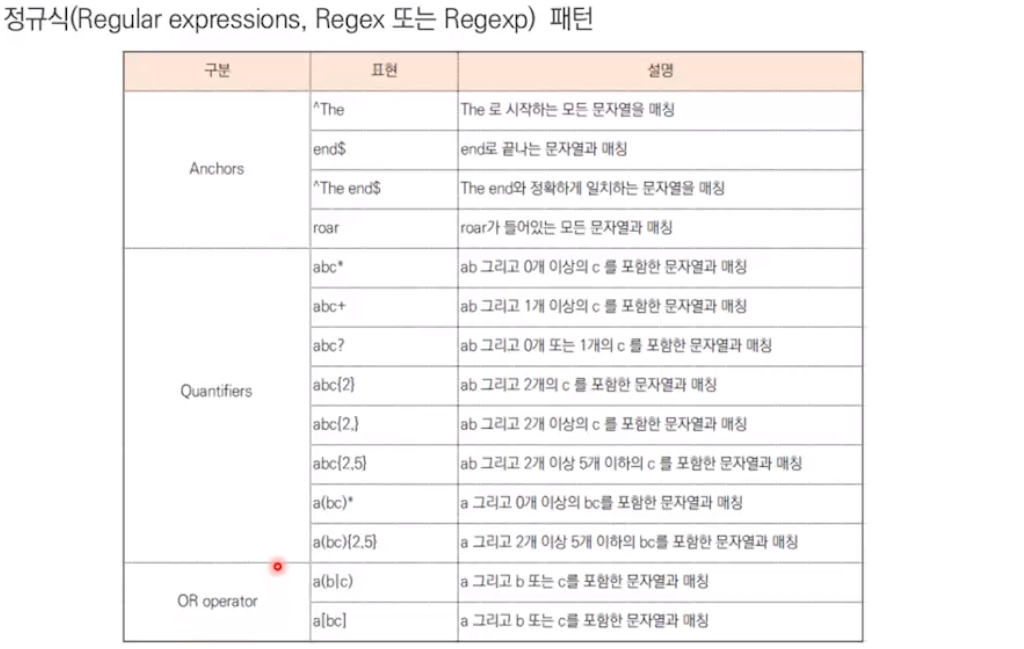

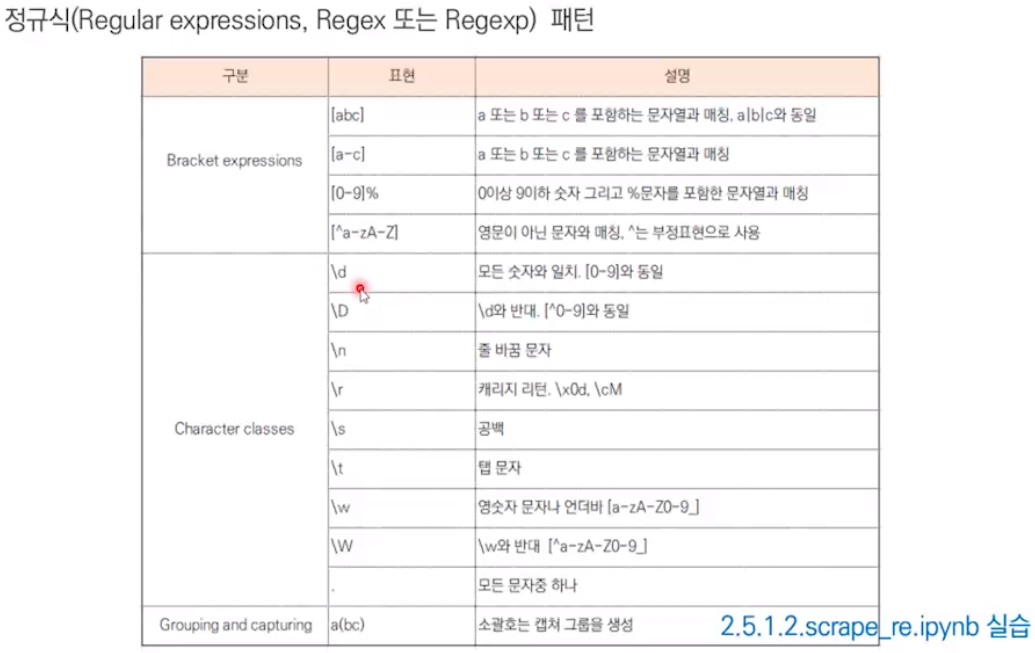

##### < 2.5.1.1.python_re >

##### re.search()
##### 첫 번째 매개변수의 정규 표현식과 두 번째 매개변수의 문자열이 매칭되는지 확인
- 매칭되는 경우 : Match 객체 반환
- 매칭되지 않는 경우 : None 반환

In [12]:
import re

re.search(r'a.*c', 'abc123DEF')
result = re.search(r'a(.*)D', 'abc123DEF')
start, end = result.span() # abc123D"

print(result.start(), result.end()) # print(start, end)
print(result.string)

0 7
abc123DEF


In [13]:
s='abc123DEF'
result.span(), s[result.start():result.end()], result.group(0), result.group(1)

((0, 7), 'abc123D', 'abc123D', 'bc123')

##### re.IGNORECASE 또는 re.I를 지정하면 대소문자를 무시
<br>

##### match.group()
##### Match 객체의 group() 메서드로 일치한 값을 추출
##### 매개변수에 0을 지정하면 매치된 모든 값을 반환
##### 매개변수에 1 이상의 숫자를 지정하면 정규 표현식에서 ( )로 감싼 부분에 해당하는 값을 추출
##### 1이라면 1번째 그룹, 2라면 2번째 그룹 추출

In [14]:
# m = re.search(r'a(.*)C', 'abc123DEFaddc') # error!
# m = re.search(r'a(.*)C', 'abc123DEFaddc', re.I)
m = re.search(r'a(.*)C', 'abc123DEFaddc', re.IGNORECASE)
print(m.group(0), m.group(1))

abc123DEFaddc bc123DEFadd


#####  re.findall() 
##### 정규 표현식에 맞는 모든 문자열을 리스트 타입으로 추출 가능
- \w : 유니코드로 글자를 비교
- \s : 공백 문자 추출

<br>

##### re.sub()
##### 정규 표현식에 매칭되는 문자열 치환
##### 3번째 매개변수에 넣은 문자열에서 첫 번째 정규 표현식에 매칭되는 문자열을 2번째 매개변수 문자열로 치환
<br>

##### re.search()
##### 매칭되는 위치가 어디인지 탐색
<br>

##### re.match()
##### 시작부터 일치하는지를 검사

In [15]:
print("findall :\n", re.findall(r'\w{2,3}', 'This is a pen')) # 2글자 이상의 단어를 모두 추출
print("\nsub :\n", re.sub(r'\w{4}', 'That', 'This is a pen'))
print("\nsearch :\n", re.search(r'a.*E', ' abc123DEF'))
print("\nmatch :\n", re.match(r'a.*c', 'abc123DEF'))

findall :
 ['Thi', 'is', 'pen']

sub :
 That is a pen

search :
 <re.Match object; span=(1, 9), match='abc123DE'>

match :
 <re.Match object; span=(0, 3), match='abc'>


##### < 2.5.1.2.scrape_re >

In [16]:
import re
from html import unescape

#with open('13.1 웹 크롤링-스크래핑 저장.html', encoding='utf-8') as f:
with open('dp.html', encoding='utf-8') as f: # < 2.4.2.1.urlopen_encoding > 절에서 
    html = f.read()                          # 다운로드한 파일을 열고 html이라는 변수에 저장

for partial_html in re.findall(r'<td class="left"><a.*?</td>', html, re.DOTALL): # 도서 하나에 해당하는 HTML을 추출    
    url = re.search(r'<a href="(.*?)">', partial_html).group(1) # 도서의 URL 추출
    url = 'http://www.hanbit.co.kr' + url    
    title = re.sub(r'<.*?>', '', partial_html) # 태그를 제거해서 도서의 제목을 추출
    title = unescape(title)
    print('url:', url)
    print('title:', title)
    print('---')

url: http://www.hanbit.co.kr/store/books/look.php?p_code=B7623190015
title: 최신 관리회계
---
url: http://www.hanbit.co.kr/store/books/look.php?p_code=B4300598719
title: 리눅스 입문자를 위한 명령어 사전
---
url: http://www.hanbit.co.kr/store/books/look.php?p_code=B9108907099
title: 파타고니아 이야기
---
url: http://www.hanbit.co.kr/store/books/look.php?p_code=B7015117381
title: 풀스택 서버리스 :  리액트, AWS, 그래프QL을 이용한 최신 애플리케이션 개발
---
url: http://www.hanbit.co.kr/store/books/look.php?p_code=B7448632539
title: 한 권으로 배우는 작고 예쁜 꽃자수
---
url: http://www.hanbit.co.kr/store/books/look.php?p_code=B3148701816
title: IT CookBook, 처음 만나는 회로이론(2판)
---
url: http://www.hanbit.co.kr/store/books/look.php?p_code=B2591303726
title: 안전필수 시스템 제어 설계
---
url: http://www.hanbit.co.kr/store/books/look.php?p_code=B7468885216
title: 러닝 리액트(2판)
---
url: http://www.hanbit.co.kr/store/books/look.php?p_code=B9354330938
title: 업무에 바로 쓰는 SQL 튜닝
---
url: http://www.hanbit.co.kr/store/books/look.php?p_code=B9602652686
title: 데이터 스토리
---
url: http://www.h

### XML을 이용한 스크래핑
##### RSS란?
##### Really Simple Syndication - Rich Site Summary
##### 뉴스나 블로그 등 업데이트가 빈번한 사이트에서 주로 사용하는 콘텐츠 표현 방식
##### 구독자들에게 업데이트된 정보를 요잉하게 제공하기 위해 XML 기반으로 정보 표현 및 제공
<br>

##### RSS서비스를 이용하면 업데이트된 정보를 찾기 위해 홈페이지를 일일히 방문하지 않아도 
##### 업데이트 될 때마다 빠르고 편리하게 이용할 수 있으며, 브라우저 확장 프로그램으로 제공되기도 함

##### < 2.5.2.1.python_rss >

In [17]:
from xml.etree import ElementTree # ElementTree 모듈을 로드
import pandas as pd

tree = ElementTree.parse('rss.xml') # 파일을 읽고 ElementTree 객체를 생성함
root = tree.getroot() # XML의 루트 element를 추출

데이터프레임_리스트 = []
for item in root.findall('channel/item/description/body/location/data'):    
    tm_ef = item.find('tmEf').text # find() 메서드로 element 탐색해서 text 속성으로 값을 추출
    tmn = item.find('tmn').text
    tmx = item.find('tmx').text
    wf = item.find('wf').text
    
    데이터프레임 = pd.DataFrame({
        '일시':[tm_ef],
        '최저기온':[tmn],
        '최고기온':[tmx],
        '날씨':[wf],
    })
    
    데이터프레임_리스트.append(데이터프레임)
    날씨정보 = pd.concat(데이터프레임_리스트)
    
print("날씨정보 type : ", type(날씨정보))
날씨정보

날씨정보 type :  <class 'pandas.core.frame.DataFrame'>


일시 최저기온 최고기온     날씨
0   2020-06-25 00:00   21   26  흐리고 비
0   2020-06-25 12:00   21   26  흐리고 비
0   2020-06-26 00:00   21   29  흐리고 비
0   2020-06-26 12:00   21   29   구름많음
0   2020-06-27 00:00   22   29   구름많음
..               ...  ...  ...    ...
0   2020-06-29 00:00   23   26  흐리고 비
0   2020-06-29 12:00   23   26  흐리고 비
0   2020-06-30 00:00   22   26  흐리고 비
0   2020-07-01 00:00   22   26  흐리고 비
0   2020-07-02 00:00   22   27     흐림

[533 rows x 4 columns]

In [18]:
날씨정보.to_csv('13.3 데이터 저장 날씨정보.csv')          # 데이터프레임 csv로 저장
엑셀 = pd.ExcelWriter('13.3 데이터 저장 날씨정보.xlsx')  # 데이터프레임 xlsx로 저장

날씨정보.to_excel(엑셀, '.', index=False )
엑셀.save()

날씨정보.reset_index(drop=True, inplace=True)
날씨정보.to_json('13.3 데이터 저장 날씨정보.json')       # 데이터프레임 json으로 저장

In [19]:
import sqlite3
from pandas.io import sql
import os

with sqlite3.connect(os.path.join('.','13.3 데이터 저장 sqliteDB')) as con: # sqlite DB 파일이 존재하지 않는 경우 파일생성
    try:
        날씨정보.to_sql(name = 'WEATHER_INFO', con = con, index = False, if_exists='append') 
        ''' if_exists 옵션
            'fail'    -> 아무 동작도 수행하지 않음(기본값)
            'replace' -> 기존 테이블을 삭제하고 새로 테이블 생성해서 데이터를 삽입함
            'append'  -> 이미 테이블이 존재하면 해당 테이블에 데이터를 삽입
        '''
    except Exception as e:
        print(str(e))
    
    query = 'SELECT * FROM WEATHER_INFO'
    데이터프레임1 = pd.read_sql(query, con = con)
    
데이터프레임1

일시 최저기온 최고기온     날씨
0    2020-06-25 00:00   21   26  흐리고 비
1    2020-06-25 12:00   21   26  흐리고 비
2    2020-06-26 00:00   21   29  흐리고 비
3    2020-06-26 12:00   21   29   구름많음
4    2020-06-27 00:00   22   29   구름많음
..                ...  ...  ...    ...
528  2020-06-29 00:00   23   26  흐리고 비
529  2020-06-29 12:00   23   26  흐리고 비
530  2020-06-30 00:00   22   26  흐리고 비
531  2020-07-01 00:00   22   26  흐리고 비
532  2020-07-02 00:00   22   27     흐림

[533 rows x 4 columns]

In [20]:
엑셀 = pd.ExcelWriter('13.3 데이터 저장 날씨정보2.xlsx')
데이터프레임1.to_excel(엑셀, '.', index=False )
엑셀.save()  # 데이터프레임1을 엑셀파일로 저장

df = pd.read_excel('13.3 데이터 저장 날씨정보2.xlsx') # 엑셀파일 읽어옴
df

일시  최저기온  최고기온     날씨
0    2020-06-25 00:00    21    26  흐리고 비
1    2020-06-25 12:00    21    26  흐리고 비
2    2020-06-26 00:00    21    29  흐리고 비
3    2020-06-26 12:00    21    29   구름많음
4    2020-06-27 00:00    22    29   구름많음
..                ...   ...   ...    ...
528  2020-06-29 00:00    23    26  흐리고 비
529  2020-06-29 12:00    23    26  흐리고 비
530  2020-06-30 00:00    22    26  흐리고 비
531  2020-07-01 00:00    22    26  흐리고 비
532  2020-07-02 00:00    22    27     흐림

[533 rows x 4 columns]

--- 

### 13.3 데이터 저장

### CVS 형식으로 저장
##### CSV란?
##### 하나의 레코드를 한 라인에 저장하는 텍스트 포맷 파일
##### 각 라인의 컬럼값은 콤마 등의 구분자를 사용
##### 데이터 내의 콤마 등의 구분자 사용하는 문자가 포함되어 있으면 파싱할 때 문제가 발생하므로
##### 문자가 포함되어 있는 경우 TSV(Tab Seperated Values) 형식 사용이 필요함

##### < 2.6.1.1.save_csv >
##### file open, newline=''으로 개행문자 지정
<br>

##### csv.writer(f)  
- 파일 객체를 매개변수로 지정

In [21]:
import csv

# with open('top_cities.csv', 'w', newline='') as f:
with open('13.3 csv형식으로 저장 top_cities.csv', 'w', newline='') as f:
    writer = csv.writer(f)  
    writer.writerow(['rank', 'city', 'population'])  # 첫 번째 줄에는 헤더를 작성
    
    writer.writerows([ # writerows()에 리스트를 전달하면 여러 개의 값을 출력
        [1, '상하이', 24150000],
        [2, '카라치', 23500000],
        [3, '베이징', 21516000],
        [4, '텐진', 14722100],
        [5, '이스탄불', 14160467],
        [6, '서울', 62624167]
    ])

##### < 2.6.1.2.save_csv_dict >
<br>

##### csv.DictWriter(파일객체, 필드명 리스트)
- 첫 번째 매개변수에 파일 객체
- 두 번째 매개변수에 필드명 리스트를 지정   

In [22]:
import csv

# with open('top_cities.csv', 'w', newline='') as f: 
with open('13.3 csv형식으로 저장 top_cities_dict.csv', 'w', newline='') as f:
    writer = csv.DictWriter(f, ['rank', 'city', 'population']) 
    writer.writeheader() # 첫 번째 줄에 헤더를 입력
    
    writer.writerows([   # writerows()로 여러 개의 데이터를 딕셔너리 형태로 작성
        {'rank': 1, 'city': '상하이', 'population': 24150000},
        {'rank': 2, 'city': '카라치', 'population': 23500000},
        {'rank': 3, 'city': '베이징', 'population': 21516000},
        {'rank': 4, 'city': '텐진', 'population': 14722100},
        {'rank': 5, 'city': '이스탄불', 'population': 14160467},
    ])

##### < 2.6.1.3.encoding_check >

<br>

##### chardet.detect()
##### 문장단위 텍스트 인코딩 확인

In [23]:
import csv
import chardet

with open('13.3 csv형식으로 저장 top_cities_dict_utf-8.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.DictWriter(f, ['rank', 'city', 'population'])      
    writer.writeheader() # 첫 번째 줄에 헤더를 입력
    
    writer.writerows([   # writerows()로 여러 개의 데이터를 딕셔너리 형태로 작성
        {'rank': 1, 'city': '상하이', 'population': 24150000},
        {'rank': 2, 'city': '카라치', 'population': 23500000},
        {'rank': 3, 'city': '베이징', 'population': 21516000},
        {'rank': 4, 'city': '텐진', 'population': 14722100},
        {'rank': 5, 'city': '이스탄불', 'population': 14160467},
    ])
    
char_dic = chardet.detect(open('top_cities.csv', 'rb').read())
char_dic['encoding']

'EUC-KR'

In [24]:
char_dic

{'encoding': 'EUC-KR', 'confidence': 0.6666666666666666, 'language': 'Korean'}

### JSON 형식으로 저장
##### JSON이란?
##### JavaScript Object Notation
##### Key-Value 형식의 데이터 객체를 저장/전달하기 위한 텍스트 형식의 개방형 표준 포맷 플랫폼
##### 프로그래밍 언어 독립적 데이터 포맷
<br>

##### JSON 데이터 타입
- 문자열(string)
- 숫자(number)
- 객체(JSON object)
- 배열(array)
- 불리언(boolean)
- null

##### < 2.6.2.1.save_json >

In [25]:
import json

cities = [ 
{'rank': 1, 'city':'상하이', 'population': 24150000},
{'rank': 2, 'city':'카라치', 'population': 23500000},
{'rank': 3, 'city':'베이징', 'population': 21516000},
{'rank': 4, 'city':'텐진', 'population': 14722100}, 
{'rank': 5, 'city':'이스탄불', 'population':14160467},
]


with open('13.3 JSON 형식으로 저장 top_cities.json', 'w') as fw:
    json.dump(cities, fw)
    
    
with open('13.3 JSON 형식으로 저장 top_cities.json', 'r') as fr:
    json_file = json.load(fr)
    print(json_file)    
    

[{'rank': 1, 'city': '상하이', 'population': 24150000}, {'rank': 2, 'city': '카라치', 'population': 23500000}, {'rank': 3, 'city': '베이징', 'population': 21516000}, {'rank': 4, 'city': '텐진', 'population': 14722100}, {'rank': 5, 'city': '이스탄불', 'population': 14160467}]


### SQLite3 DBMS로 저장
##### SQLite3 DBMS란?
##### 파일시스템 기반의 경량 관계형 DBMS
##### 경량 관계형 DBMS로 스마트폰 등의 EMBEDDED 환경에서 널리 사용
##### 파이썬에서는 SQLite3가 기본 모듈로 제공됨
##### 대용량 데이터 및 트랜잭션 처리 부적합
##### 경량 데이터 및 트랜잭션 처리와 교육용 목적으로 사용함에 적합

##### < 2.6.3.1.save_sqlite3 >

In [26]:
import pandas as pd
import sqlite3
from pandas.io import sql
import os

DB_NAME = '13.3 SQLite3 DBMS 데이터 저장 top_cities.db'
TABLE_NAME = 'TOP_CITIES'

def db_save(df, db_name, table_name):
    with sqlite3.connect(db_name) as con:
        try:
            df.to_sql(name = table_name, con = con, index = False, if_exists='append') 
            #if_exists : {'fail', 'replace', 'append'} default : fail
        except Exception as e:
            print(str(e))
        print(len(df), '건 저장완료..')

def db_select(db_name, table_name):
    with sqlite3.connect(db_name) as con: 
        try:
            query = 'SELECT * FROM {}'.format(table_name)
            df = pd.read_sql(query, con = con)
        except Exception as e:
            print(str(e)) 
        return df  

def db_delete(db_name, table_name):
    with sqlite3.connect(db_name) as con: 
        try:
            cur = con.cursor()
            sql = 'DELETE FROM {}'.format(table_name)
            cur.execute(sql)
        except Exception as e:
            print(str(e)) 
            
top_cites = pd.read_csv('./13.3 csv형식으로 저장 top_cities_dict_utf-8.csv')
db_save(top_cites, DB_NAME, TABLE_NAME)

5 건 저장완료..


In [27]:
df = db_select(DB_NAME, TABLE_NAME) # db 컬럼 출력
df

rank  city  population
0     1   상하이    24150000
1     2   카라치    23500000
2     3   베이징    21516000
3     4    텐진    14722100
4     5  이스탄불    14160467

In [28]:
df = db_delete(DB_NAME, TABLE_NAME) # db 컬럼 삭제
df

--- 

### 13.4 스크래핑 프로세스

### HTML 스크래핑
##### HTML 스크래핑을 위한 파이썬 라이브러리
- lxml, Beautiful Soup, pyquery, ...

<br>

##### 1) lxml
##### c언어로 작성된 XML 처리와 관련된 라이브러리인 libxml2와 libxslt의 파이썬 바인딩
##### libxml2와 libxslt는 c언어로 작성되어 있기 때문에 빠르기 동작
##### 파이썬에서 사용이 용이하도록 api 구현해놓음

<br>

##### 2) Beautiful Soup
##### 간단하고 이해하기 쉬운 직관적인 api를 활용해서 데이터를 추출할 수 있음
##### 내부적으로 사용되는 파서를 목적에 맞게 변경할 수 있음

##### < 2.7.1.1.python_scraper >
<br>

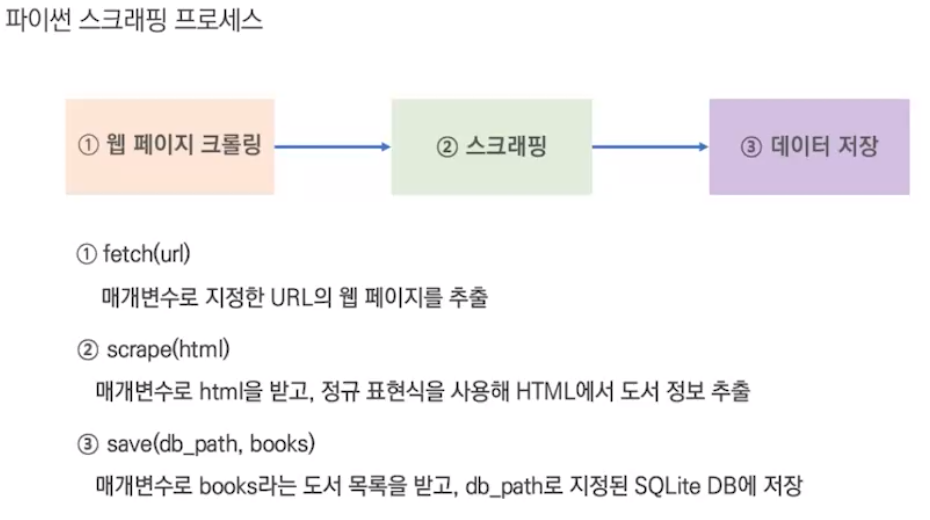

In [29]:
import re
import sqlite3
from urllib.request import urlopen
from html import unescape
import pandas as pd
import os


def fetch(url):
    """
    매개변수로 전달받을 url을 기반으로 웹 페이지를 추출
    웹 페이지의 Content-Type 헤더를 통해 인코딩 형식 확인
    반환값: str 자료형의 HTML
    """
    f = urlopen(url)    
    encoding = f.info().get_content_charset(failobj="utf-8") # HTTP 헤더를 기반으로 인코딩 형식 추출
    html = f.read().decode(encoding) # 추출한 인코딩 형식을 기반으로 문자열 디코딩
    return html


def scrape(html):
    """
    매개변수 html로 받은 HTML을 기반으로 정규 표현식을 사용해 도서 정보를 추출합니다.
    반환값: 도서(dict) 리스트
    """
    books = []
    
    for partial_html in re.findall(r'<td class="left"><a.*?</td>', html, re.DOTALL): # 도서 하나에 해당하는 HTML 추출        
        url = re.search(r'<a href="(.*?)">', partial_html).group(1) # 도서 URL을 추출
        url = 'http://www.hanbit.co.kr' + url        
        title = re.sub(r'<.*?>', '', partial_html) # 태그를 제거해서 도서 제목 추출
        title = unescape(title)
        books.append(pd.DataFrame({'url': [url], 'title': [title]}))
    return pd.concat(books)


def save(db_path, books):
    with sqlite3.connect(os.path.join('.', db_path)) as con: # sqlite DB 파일이 존재하지 않는 경우 파일생성
        try:
            books.to_sql(name = 'BOOKS_INFO', con = con, index = False, if_exists='append') 
            #if_exists : {'fail', 'replace', 'append'} default : fail
        except Exception as e:
            print(str(e))
    
    query = 'SELECT * FROM BOOKS_INFO'
    df = pd.read_sql(query, con = con)
    return df


html = fetch('http://www.hanbit.co.kr/store/books/full_book_list.html')

df = scrape(html)
df.reset_index(drop=True, inplace=True)
df2 = save('13.4 스크래핑 프로세스 books.db', df)
df2

url  \
0   http://www.hanbit.co.kr/store/books/look.php?p...   
1   http://www.hanbit.co.kr/store/books/look.php?p...   
2   http://www.hanbit.co.kr/store/books/look.php?p...   
3   http://www.hanbit.co.kr/store/books/look.php?p...   
4   http://www.hanbit.co.kr/store/books/look.php?p...   
5   http://www.hanbit.co.kr/store/books/look.php?p...   
6   http://www.hanbit.co.kr/store/books/look.php?p...   
7   http://www.hanbit.co.kr/store/books/look.php?p...   
8   http://www.hanbit.co.kr/store/books/look.php?p...   
9   http://www.hanbit.co.kr/store/books/look.php?p...   
10  http://www.hanbit.co.kr/store/books/look.php?p...   
11  http://www.hanbit.co.kr/store/books/look.php?p...   
12  http://www.hanbit.co.kr/store/books/look.php?p...   
13  http://www.hanbit.co.kr/store/books/look.php?p...   
14  http://www.hanbit.co.kr/store/books/look.php?p...   
15  http://www.hanbit.co.kr/store/books/look.php?p...   
16  http://www.hanbit.co.kr/store/books/look.php?p...   
17  http://www.hanbit.co.kr/store/books/look.php?p...   
18  http://www.hanbit.co.kr/store/books/look.php?p...   
19  http://www.hanbit.co.kr/store/books/look.php?p...   
20  http://www.hanbit.co.kr/store/books/look.php?p...   
21  http://www.hanbit.co.kr/store/books/look.php?p...   
22  http://www.hanbit.co.kr/store/books/look.php?p...   
23  http://www.hanbit.co.kr/store/books/look.php?p...   
24  http://www.hanbit.co.kr/store/books/look.php?p...   
25  http://www.hanbit.co.kr/store/books/look.php?p...   
26  http://www.hanbit.co.kr/store/books/look.php?p...   
27  http://www.hanbit.co.kr/store/books/look.php?p...   
28  http://www.hanbit.co.kr/store/books/look.php?p...   
29  http://www.hanbit.co.kr/store/books/look.php?p...   
30  http://www.hanbit.co.kr/store/books/look.php?p...   
31  http://www.hanbit.co.kr/store/books/look.php?p...   
32  http://www.hanbit.co.kr/store/books/look.php?p...   
33  http://www.hanbit.co.kr/store/books/look.php?p...   
34  http://www.hanbit.co.kr/store/books/look.php?p...   
35  http://www.hanbit.co.kr/store/books/look.php?p...   
36  http://www.hanbit.co.kr/store/books/look.php?p...   
37  http://www.hanbit.co.kr/store/books/look.php?p...   
38  http://www.hanbit.co.kr/store/books/look.php?p...   
39  http://www.hanbit.co.kr/store/books/look.php?p...   
40  http://www.hanbit.co.kr/store/books/look.php?p...   
41  http://www.hanbit.co.kr/store/books/look.php?p...   
42  http://www.hanbit.co.kr/store/books/look.php?p...   
43  http://www.hanbit.co.kr/store/books/look.php?p...   
44  http://www.hanbit.co.kr/store/books/look.php?p...   
45  http://www.hanbit.co.kr/store/books/look.php?p...   
46  http://www.hanbit.co.kr/store/books/look.php?p...   
47  http://www.hanbit.co.kr/store/books/look.php?p...   
48  http://www.hanbit.co.kr/store/books/look.php?p...   
49  http://www.hanbit.co.kr/store/books/look.php?p...   

                                            title  
0                                         최신 관리회계  
1                              리눅스 입문자를 위한 명령어 사전  
2                                       파타고니아 이야기  
3   풀스택 서버리스 :  리액트, AWS, 그래프QL을 이용한 최신 애플리케이션 개발  
4                             한 권으로 배우는 작고 예쁜 꽃자수  
5                    IT CookBook, 처음 만나는 회로이론(2판)  
6                                  안전필수 시스템 제어 설계  
7                                      러닝 리액트(2판)  
8                                업무에 바로 쓰는 SQL 튜닝  
9                                         데이터 스토리  
10                                        상식의 재구성  
11                                 처음 배우는 네트워크 보안  
12                 찾아도 찾아도 끝판왕 1000개 숨은그림찾기 우리 동네  
13                찾아도 찾아도 끝판왕 1000개 숨은그림찾기 숲속 놀이터  
14                    IT CookBook, 디지털 콘텐츠 기획(2판)  
15                 IT CookBook, C로 배우는 쉬운 자료구조 4판  
16                IT CookBook, 쉽게 배우는 소프트웨어 공학 2판  
17                    IT CookBook, 컴퓨터 구조와 원리 3.0  
18      IT CookBook, 최신 기술 동향으로 알아보는 ICT와 4차 산업혁명  
19        초보 판매자가 빅파워셀러로 거듭나는 네이버 스마트스토어 마케팅 시작하기  
20                STEM CookBook, 한 걸음씩 알아가는 선형대수학 

##### 3.2.1.1.requests_test

In [30]:
# !pip install requests
import requests 

r = requests.get('http://hanbit.co.kr')   # get() 함수로 웹 페이지를 추출

print("type :", type(r)) # get() 함수의 반환값은 Response 자료
print("status :", r.status_code) # status_code 속성으로 HTTP 상태 코드를 확인
print("헤더 속성 :", r.headers['content-type' ]) # headers 속성으로 HTTP 헤더를 딕셔 너리로 추출
print("encoding :", r.encoding) # encoding 속성으로 HTTP 헤더를 기반으로 인코딩을 추출

type : <class 'requests.models.Response'>
status : 200
헤더 속성 : text/html; charset=UTF-8
encoding : UTF-8


In [31]:
print(r.text) # text 속성으로 str 자료형으로 디코딩된 응답 본문을 추출

<!DOCTYPE html>
<html lang="ko">
<head>
<!--[if lte IE 8]>
<script>
  location.replace('/support/explorer_upgrade.html');
</script>
<![endif]-->
<meta charset="utf-8"/>
<title>한빛출판네트워크</title>
<link rel="shortcut icon" href="https://www.hanbit.co.kr/images/common/hanbit.ico"> 
<meta http-equiv="X-UA-Compatible" content="IE=Edge" />
<meta property="og:type" content="website"/>
<meta property="og:title" content="한빛출판네트워크"/>
<meta property="og:description" content="더 넓은 세상, 더 나은 미래를 위한 아시아 출판 네트워크 :: 한빛미디어, 한빛아카데미, 한빛비즈, 한빛라이프, 한빛에듀"/>
<meta property="og:image" content="https://www.hanbit.co.kr/images/hanbitpubnet_logo.jpg" />
<meta property="og:url" content="https://hanbit.co.kr/"/>
<link rel="canonical" href="https://hanbit.co.kr/" />
<meta name="keywords" content="한빛미디어,한빛아카데미,한빛비즈,한빛라이프,한빛에듀,리얼타임,대관서비스,책,출판사,IT전문서,IT활용서,대학교재,경제경영,어린이/유아,실용/여행,전자책,자격증,교육,세미나,강의,ebook,정보교과서" />
<meta name="description" content="더 넓은 세상, 더 나은 미래를 위한 아시아 출판 네트워크 :: 한빛미디어, 한빛아카데미, 한빛비즈, 한빛라이프, 한빛에듀" />
<me

In [32]:
#r = requests.get('http://weather.livedoor.com/forecast/webservice/json/v1?city=130010') 
#r.json() # 주소 잘못된듯?

# 딕셔너리 형태로 json 파일 읽어옴
r = requests.get('https://gist.githubusercontent.com/TWpower/771f9dfc8d9e1ddc0ecbdaea5b2e379e/raw/2c7785b4835138255bdadb71bd83702e53ac2677/test-example.json') 
r.json()

{'data': [{'type': 'articles',
   'id': '1',
   'attributes': {'title': 'JSON API paints my bikeshed!',
    'body': 'The shortest article. Ever.',
    'created': '2015-05-22T14:56:29.000Z',
    'updated': '2015-05-22T14:56:28.000Z'},
   'relationships': {'author': {'data': {'id': '42', 'type': 'people'}}}}],
 'included': [{'type': 'people',
   'id': '42',
   'attributes': {'name': 'John', 'age': 80, 'gender': 'male'}}]}

##### < 3.3.2.1.scrape_by_lxml >

- lxml.etree : ElementTree를 확장한 api를 가진 XML parser
- lxml.html : xml.etree를 기반으로 invalid HTML도 다룰 수 있게 해주는 HTML parser
- lxml.objectify : 트리를 객체 계층으로 다룰 수 있게 해주는 XML parser
- lxml.sax : SAM 형식의 XML parser

In [33]:
# !pip install lxml
# !pip install cssselect
import lxml.html

tree = lxml.html.parse('13.1 웹 크롤링-스크래핑 저장.html') # HTML 파일을 읽어옴
html = tree.getroot() # HtmlElement 객체 생성

for a in html.cssselect('a'):    # a 요소의 리스트를 추출
    print(a.get('href'), a.text) # href 속성과 글자 출력

/ 
            
/education 과정안내
/external-lectures 외부강의
/notices 공지사항
/lessons 나의 강의실
/login 로그인
/membership/find-id 
                    아이디 찾기
                
/membership/find-password 
                    비밀번호 찾기
                
/notices/32 [필독] [안내] 온아이리포 수강시 배속 조정 수강으로 인한 진척률 미반영 관련
/notices/30 [복습안내] 1주차 과목 재오픈 
/notices/28 [온아이리포] 파이썬 프로그래밍이해(2) : 8-2강 조건문 실습 수강 안내
/notices 
                    공지사항 & 소식 전체 보기
                
/locations 찾아오시는 길
/privacy-policy 개인정보보호방침
/terms-of-service 이용약관
/education 과정안내
/external-lectures 외부강의
/notices 공지사항
/lessons 나의 강의실
/login 로그인


##### < 3.3.2.2.scrape_by_bs4 >
<br>

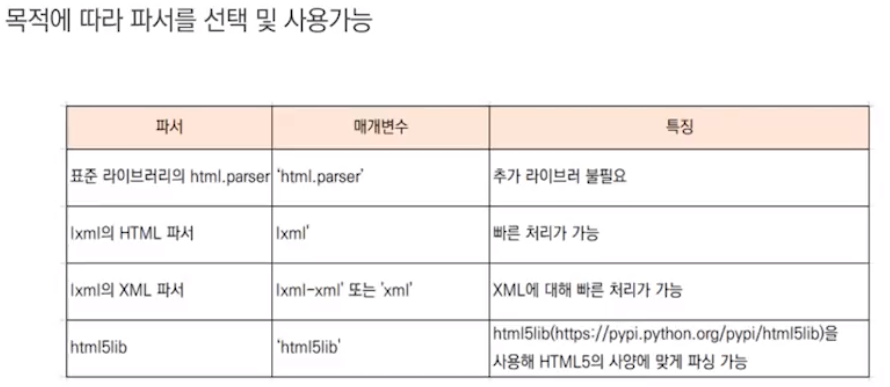

In [34]:
from bs4 import BeautifulSoup

# with open('./data/full_book_list.html') as f:
with open('13.1 웹 크롤링-스크래핑 저장.html', encoding='utf-8') as f: # BeautifulSoup 객체 생성
    soup = BeautifulSoup(f, 'html.parser')

for a in soup.find_all('a'):     # a 요소를 추출
    print(a.get('href'), a.text) # href 속성과 글자 출력

/ 


/education 과정안내
/external-lectures 외부강의
/notices 공지사항
/lessons 나의 강의실
/login 로그인
/membership/find-id 
                    아이디 찾기
                
/membership/find-password 
                    비밀번호 찾기
                
/notices/32 [필독] [안내] 온아이리포 수강시 배속 조정 수강으로 인한 진척률 미반영 관련
/notices/30 [복습안내] 1주차 과목 재오픈 
/notices/28 [온아이리포] 파이썬 프로그래밍이해(2) : 8-2강 조건문 실습 수강 안내
/notices 
                    공지사항 & 소식 전체 보기
                
/locations 찾아오시는 길
/privacy-policy 개인정보보호방침
/terms-of-service 이용약관
/education 과정안내
/external-lectures 외부강의
/notices 공지사항
/lessons 나의 강의실
/login 로그인


### URL 구조
<br>

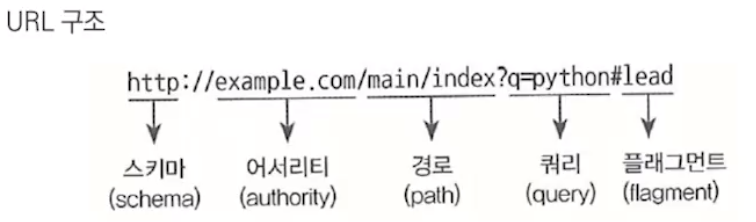

<br>


##### URL 구성요소
- schema : http 또는 https와 같은 프로토콜  
- authority : 도메인 명 : 포트번호  
- path : 호스트 내부에서의 리소스 경로  
- query : ? 뒤에 나오는 경로와는 다른 방법으로 리소스를 표현하는 방법  
- '#' 뒤에 나오는 리소스 내부의 특정 부분  

<br>

##### 절대 URL과 상대 URL
##### 절대 URL : https : // 등의 스키마로 시작하는 URL
##### 상대 URL : 절대 URL을 기준으로 상대적인 경로를 잡는 URL

<br>

##### 상대 URL에는 3가지 종류의 형식
- //로 시작하는 상대 URL
- / 로 시작하는 상대 URL
- 그 밖의 상대 경로 형식을 사용하는 상대 URL 

<br>

##### urljoin(기준이 되는 URL, 상대 URL)
##### 상대 URL을 절대 URL로 변환해주는 urllib.parse 라이브러리 함수

### 퍼머 링크란?
##### 최근 웹사이트는 하나의 콘텐츠가 하나의 URI에 대응함
##### 즉, 하나의 콘텐츠에 대응되며, 시간이 흘러도 대응되는 콘텐츠가 변하지 않는 URL임
##### 퍼머링크를 가진 웹사이트는 구글 등의 검색 엔진의 크롤러가 콘텐츠 인식하기 용이함
##### 소셜 미디어에 콘텐츠를 공유할때도 사용할 수 있으므로 많은 웹사이트가 퍼머링크를 사용함

<br>

##### 목록/상세 패턴
##### 퍼머링크를 사용하는 웹사이트는 대부분 퍼머링크를 가진 페이지로 연결되는 링크가 목록으로 존재함
##### 목록 페이지와 상세 페이지의 조합으로 구성되어 있는 웹사이트의 링크 구조 패턴임
<br>

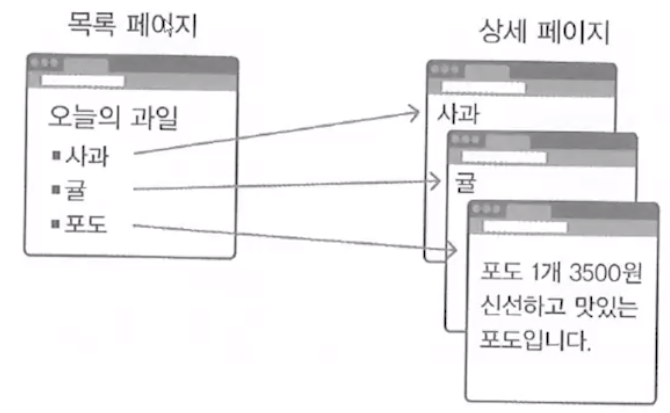


--- 